# A simple example for logistic regression
This notebook calculates a logistic regression using theano. It's basically meant to show the principles of theano.

## Datset

We investigate the data set of the challenger flight with broken O-rings (Y=1) vs start temperature.

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


[40, 85, -0.1, 1.2]

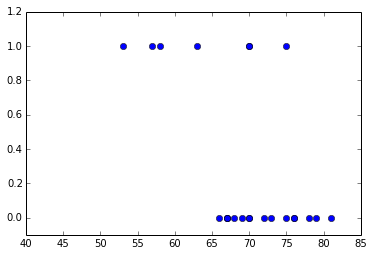

In [1]:
%pylab
%matplotlib inline
import pandas as pd
import numpy as np
data = np.asarray(pd.read_csv('challenger.txt', sep=','), dtype='float32')
plt.plot(data[:,0], data[:,1], 'o')
plt.axis([40, 85, -0.1, 1.2])

## Mathematical Notes
We are considering the likelihood $p(y_i=1|x_i)$ for the class $y_i=1$ given the $i-$th data point $x_i$ ($x_i$ could be a vector). This is given by:
$
p(y_i=1 | x_i) = \frac{e^{(b + W' x_i)}}{1 + e^{(b + W' x_i)}} = [1 + e^{-(b + W' x_i)}]^{-1}
$

If we have more than one data point, which we usually do, we have to apply the equation above to each of the N data points. In this case we can used a vectorized version with $x=(x_1,x_2,\ldots,x_N)$ and $y=(y_1,y_2,\ldots,y_N$)

In [2]:
import numpy
import theano
import theano.tensor as T
rng = numpy.random

feats = 1
# Symbolic Variables 
x = T.matrix("x") 
y = T.vector("y")

# Shared Variables (symbolic Variables  changes between differnt calls)
w = theano.shared(rng.randn(feats), name="w")
b = theano.shared(10., name="b")
print "Initial model: w = {}, b = {}".format(w.get_value(), b.get_value())

# Construct log-likelihood as a symbolic expression
p_1 = 1 / (1 + T.exp(-T.dot(x, w) - b))       # p_1 = p(y=1 | x)
like = y * T.log(p_1) + (1-y) * T.log(1-p_1)  # Log likelihood for the vectors of the trainigset

# Costfunction is sum of all likelihoods in the training set. Since N is constant taking mean is also OK.
cost = -like.mean()

# This is the real strength of theano, we calculate the gradient of the cost function w.r.t w and b
gw, gb = T.grad(cost, [w, b])

# Compile a theano function based on the provided input for training
train = theano.function(
          inputs=[x,y],         #Goes into the function
          outputs=[p_1, cost],  #Is used inside the function
          updates=((w, w - 0.001 * gw), (b, b - 0.1 * gb)) # w and b will be updated by a function call as follows.
)

# Compile a theano function for testing
predict = theano.function(inputs=[x], outputs=p_1)

Initial model: w = [ 0.78847617], b = 10.0


In [3]:
x_vals = data[:,0]
x_vals = np.resize(x_vals,[len(x_vals),1]) #Need to be a matrix, here of length 1 for one parameter
y_vals = data[:,1]

## Training of the logistic regression

i=0 total error = 46.5174564385 w = [ 0.73830225] b = 9.93043478157 
i=2500 total error = 0.452954202675 w = [-0.16102626] b = 10.177658701 
i=5000 total error = 0.448262180589 w = [-0.17662375] b = 11.2450733242 
i=7500 total error = 0.445652002842 w = [-0.1882694] b = 12.0417270522 
i=10000 total error = 0.444131198691 w = [-0.1971645] b = 12.650083691 
i=12500 total error = 0.443214874859 w = [-0.20407215] b = 13.1224464776 
i=15000 total error = 0.442648834721 w = [-0.20950294] b = 13.4937829895 
i=17500 total error = 0.442292512538 w = [-0.21381276] b = 13.7884515716 
i=20000 total error = 0.442064925841 w = [-0.21725772] b = 14.0239767102 
i=22500 total error = 0.441917908786 w = [-0.22002688] b = 14.2132925906 
i=25000 total error = 0.44182208793 w = [-0.22226271] b = 14.366141991 
i=27500 total error = 0.441759191531 w = [-0.22407428] b = 14.4899847313 
i=30000 total error = 0.441717672472 w = [-0.22554623] b = 14.5906084482 
i=32500 total error = 0.441690140188 w = [-0.2267449

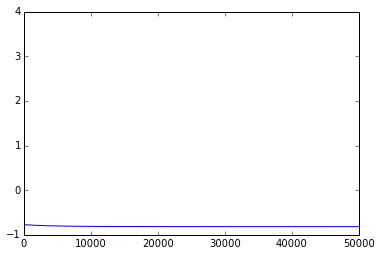

In [4]:
# Train
num_training = 50000
epoch = np.zeros(num_training)
for i in range(num_training):
    pred, err = train(x_vals, y_vals)
    epoch[i] = err
    if (i % int(num_training / 20.0) == 0):
        print("i={} total error = {} w = {} b = {} ".format(i,err, w.get_value(), b.get_value()))

print "Final model: w = {}, b = {}".format(w.get_value(), b.get_value())
plt.plot(np.log(epoch))

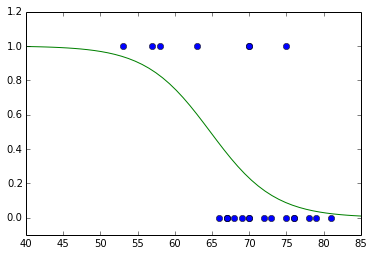

In [5]:
plt.plot(data[:,0], data[:,1], 'o')
plt.axis([40, 85, -0.1, 1.2])
x_pred = np.linspace(40,85, dtype='float32')
x_pred = np.resize(x_pred,[len(x_pred),1])
y_pred = predict(x_pred)
plt.plot(x_pred, y_pred)